# Significance testing

In this notebook we use the results of the notebook "Extracting and implementing structural features of winning tickets" to test our hypothesees. 

Our Hypothesees are:  
1. Weight distribution pruning performs better than random pruning.
2. Positional probability pruning performs better than random pruning.
3. Adapting the sign ratio leads to better performance for every pruning type.
4. The winning ticket conv1 layer outperforms all other conditions

## Load and plot accuracies

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
# load the measured accuracies

all_accuracies = np.load("experiment_accuracies.npy")
print("The accuracies have the shape ", all_accuracies.shape, "corresponging to (conditions, models, epochs).")

The accuracies have the shape  (7, 16, 12) corresponging to (conditions, models, epochs).


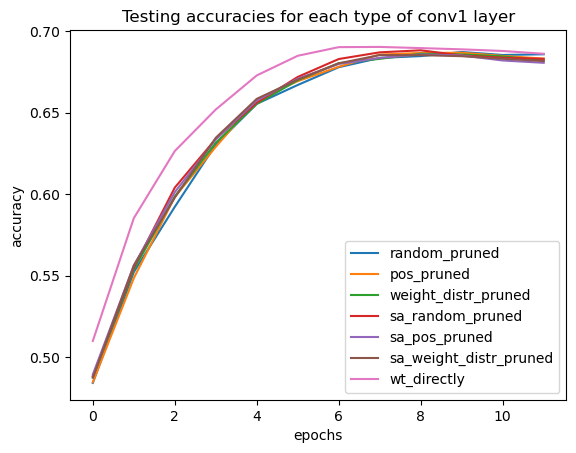

In [3]:
# plot the mean performances for all conditions

all_conditions = ["random_pruned","pos_pruned","weight_distr_pruned","sa_random_pruned","sa_pos_pruned","sa_weight_distr_pruned", "wt_directly"]

for accuracies, condition in zip(all_accuracies,all_conditions):
    # calculate the mean performance over the models in one condition
    mean_accuracies = np.mean(accuracies, axis=0)
    plt.plot(mean_accuracies, label=condition)

    
# show the plot with the mean accuracies
plt.legend()
plt.xlabel('epochs')  
plt.ylabel('accuracy')  
plt.title('Testing accuracies for each type of conv1 layer') 
plt.show()

## Perform paired samples t-test

In [4]:
# test hypothesis 1
random_pruning_acc = np.concatenate([all_accuracies[0],all_accuracies[3]]).flatten()
weight_distr_pruned_acc = np.concatenate([all_accuracies[2],all_accuracies[5]]).flatten()
h1_results = scipy.stats.ttest_rel(random_pruning_acc, weight_distr_pruned_acc, alternative="less")
print(h1_results)
if h1_results.pvalue <= 0.05:
    print("We can accept hypothesis 1.")
else:
    print("We can not accept the hypothesis 1.")

TtestResult(statistic=0.10237074516838156, pvalue=0.5407420104572433, df=383)
We can not accept the hypothesis 1.


In [5]:
# test hypothesis 2
random_pruning_acc = np.concatenate([all_accuracies[0],all_accuracies[3]]).flatten()
pos_pruned_acc = np.concatenate([all_accuracies[1],all_accuracies[4]]).flatten()
h2_results = scipy.stats.ttest_rel(random_pruning_acc, pos_pruned_acc, alternative="less")
print(h2_results)
if h2_results.pvalue <= 0.05:
    print("We can accept hypothesis 2.")
else:
    print("We can not accept the hypothesis 2.")

TtestResult(statistic=0.5799895066958989, pvalue=0.7188686356853051, df=383)
We can not accept the hypothesis 2.


In [6]:
# test hypothesis 3
without_sa = np.concatenate([all_accuracies[0],all_accuracies[1],all_accuracies[2]]).flatten()
with_sa = np.concatenate([all_accuracies[3],all_accuracies[4],all_accuracies[5]]).flatten()
h3_results = scipy.stats.ttest_rel(without_sa, with_sa, alternative="less")
print(h3_results)
if h3_results.pvalue <= 0.05:
    print("We can accept hypothesis 3.")
else:
    print("We can not accept the hypothesis 3.")

TtestResult(statistic=-3.417379182952, pvalue=0.0003384853513866644, df=575)
We can accept hypothesis 3.


In [7]:
# test hypothesis 4
not_wt_directly = all_accuracies[:6].flatten()
wt_directly = all_accuracies[[6]*6].flatten()
h4_results = scipy.stats.ttest_rel(not_wt_directly,wt_directly, alternative="less")
print(h4_results)
if h4_results.pvalue <= 0.05:
    print("We can accept hypothesis 4.")
else:
    print("We can not accept the hypothesis 4.")

TtestResult(statistic=-33.60173255656502, pvalue=2.3521985091660742e-173, df=1151)
We can accept hypothesis 4.


### Intermediate Results:

The hypothesees 3 and 4 can be accepted, hypothesees 1 and 2 can not be accepted. This means we can find an increase in training performance due to sign ratio adaption and also for using conv1 layers extracted from winning tickets.

### Further analysis:

We formulate further hypothesees to test the effect of weight distributional pruning and positional probability pruning in more detail and the influence of sign ratio adaption on the effect:

5. Weight distribution pruning performs better than random pruning for non sign ratio adapted conditions.
6. Positional probability pruning performs better than random pruning for non sign ratio adapted conditions.
7. Weight distribution pruning performs better than random pruning for sign ratio adapted conditions.
8. Positional probability pruning performs better than random pruning for sign ratio adapted conditions.

In [8]:
# test hypothesis 5
random_no_sa_pruning_acc = all_accuracies[0].flatten()
weight_distr_no_sa_pruned_acc = all_accuracies[2].flatten()
h5_results = scipy.stats.ttest_rel(random_no_sa_pruning_acc, weight_distr_no_sa_pruned_acc, alternative="less")
print(h5_results)
if h5_results.pvalue <= 0.05:
    print("We can accept hypothesis 5.")
else:
    print("We can not accept the hypothesis 5.")

TtestResult(statistic=-1.6909130808965829, pvalue=0.04624226081455069, df=191)
We can accept hypothesis 5.


In [9]:
# test hypothesis 6
random_no_sa_pruning_acc = all_accuracies[0].flatten()
pos_no_sa_pruned_acc = all_accuracies[1].flatten()
h6_results = scipy.stats.ttest_rel(random_no_sa_pruning_acc, pos_no_sa_pruned_acc, alternative="less")
print(h6_results)
if h6_results.pvalue <= 0.05:
    print("We can accept hypothesis 6.")
else:
    print("We can not accept the hypothesis 6.")

TtestResult(statistic=-0.827738015415354, pvalue=0.2044259502183089, df=191)
We can not accept the hypothesis 6.


In [10]:
# test hypothesis 7
random_sa_pruning_acc = all_accuracies[3].flatten()
weight_distr_sa_pruned_acc = all_accuracies[5].flatten()
h7_results = scipy.stats.ttest_rel(random_sa_pruning_acc, weight_distr_sa_pruned_acc, alternative="less")
print(h7_results)
if h7_results.pvalue <= 0.05:
    print("We can accept hypothesis 7.")
else:
    print("We can not accept the hypothesis 7.")

TtestResult(statistic=1.6631601968930783, pvalue=0.9510398159690229, df=191)
We can not accept the hypothesis 7.


In [11]:
# test hypothesis 8
random_sa_pruning_acc = all_accuracies[3].flatten()
pos_sa_pruned_acc = all_accuracies[4].flatten()
h8_results = scipy.stats.ttest_rel(random_sa_pruning_acc, pos_sa_pruned_acc, alternative="less")
print(h8_results)
if h8_results.pvalue <= 0.05:
    print("We can accept hypothesis 8.")
else:
    print("We can not accept the hypothesis 8.")

TtestResult(statistic=1.7886394422229686, pvalue=0.9623711083183771, df=191)
We can not accept the hypothesis 8.


### Intermediate Results:

Only hypothesis 5 can be accepted, that weight distribution pruning leads to better performance in non sign ratio adapted conditions. 

### Further analysis:

For the other three hypothesees (6, 7, 8) we test the opposite relationship. The new hypothesees are:

9. Positional probability pruning performs worse than random pruning for non sign ratio adapted conditions.
10. Weight distribution pruning performs worse than random pruning for sign ratio adapted conditions.
11. Positional probability pruning performs worse than random pruning for sign ratio adapted conditions.

In [12]:
# test hypothesis 9
random_no_sa_pruning_acc = all_accuracies[0].flatten()
pos_no_sa_pruned_acc = all_accuracies[1].flatten()
h9_results = scipy.stats.ttest_rel(random_no_sa_pruning_acc, pos_no_sa_pruned_acc, alternative="greater")
print(h9_results)
if h9_results.pvalue <= 0.05:
    print("We can accept hypothesis 9.")
else:
    print("We can not accept the hypothesis 9.")

TtestResult(statistic=-0.827738015415354, pvalue=0.7955740497816911, df=191)
We can not accept the hypothesis 9.


In [13]:
# test hypothesis 10
random_sa_pruning_acc = all_accuracies[3].flatten()
weight_distr_sa_pruned_acc = all_accuracies[5].flatten()
h10_results = scipy.stats.ttest_rel(random_sa_pruning_acc, weight_distr_sa_pruned_acc, alternative="greater")
print(h10_results)
if h10_results.pvalue <= 0.05:
    print("We can accept hypothesis 10.")
else:
    print("We can not accept the hypothesis 10.")

TtestResult(statistic=1.6631601968930783, pvalue=0.04896018403097709, df=191)
We can accept hypothesis 10.


In [14]:
# test hypothesis 11
random_sa_pruning_acc = all_accuracies[3].flatten()
pos_sa_pruned_acc = all_accuracies[4].flatten()
h11_results = scipy.stats.ttest_rel(random_sa_pruning_acc, pos_sa_pruned_acc, alternative="greater")
print(h11_results)
if h11_results.pvalue <= 0.05:
    print("We can accept hypothesis 11.")
else:
    print("We can not accept the hypothesis 11.")

TtestResult(statistic=1.7886394422229686, pvalue=0.037628891681622936, df=191)
We can accept hypothesis 11.


### Intermediate Results:

We could not observe an effect of positional pruning in non sign ratio adapted conditions, but for sign ratio adapted conditions it decreases the performance. Weight distributional pruning also seems to decrease the perfromance for sign ratio adapted conditions.

## Summary of all observed effects:

* Sign adaption increases the training performance independent of pruning type (h3).
* Using conv1 layers extracted from winning tickets directly outperforms all other conditions (h4).
* Weight distribution pruning increases the training performance for non sign ratio adapted conditions and decreases training perfromance for sign ratio adapted conditions (h5, h10).
* Positional probability pruning decreases the training performance for sign ratio adapted conditions (h11). 